# Homework 1: Predicting Sox-Yankees


In [2]:
from __future__ import print_function, division

% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np

from thinkbayes2 import Pmf, Cdf, Suite
import thinkplot

The Boston Red Sox and the New York Yankees have a storied rivalry spanning decades, and the two teams might finally play each other in the playoffs for the first time since 2004. For the purposes of this problem we will assume the Yankees will win the Wild Card Game (no offense, Oakland A's) and play the Red Sox (who have clinched the division) in the Division Series. Before that, though, the Sox and Yankees play a series spanning the last 3 days of the regular season at Fenway Park.

So far this year, each time these teams have played a 3-game series, the home team has won 2 of 3 games. We aim to find how, if the Red Sox win 2 of 3 games at Fenway again, the outcome of this series will alter our prediction of the Red Sox's probability to win the Division Series a few days later.

Specifically, we seek to find the probability that the Red Sox beat the Yankees in the Division Series, provided they beat the Yankees in the final regular season series.

In [55]:
from random import random

class Games(Suite):

    def Likelihood(self, data, hypo):
        """Computes the likelihood of `data` given `hypo`.
        
        data: string 'W' or 'L'
        hypo: probability of the Red Sox winning, 0-100
        
        returns: float
        """
        if data == 'W':
            return hypo / 100
        else:
            return 1 - hypo / 100


def simulate_series(win_prob):
    """
    Simulates a 5-game series based on a given probability that the Red Sox win each individual game.
    Returns True or False, depending on whether or not they won.
    """
    wins = 0
    for i in range(5):
        if random() < win_prob:
            wins += 1
        if wins == 3:
            return True
    return False


def predict_series_prob(suite, num_iterations=10000):
    """
    Calculates the probability of winning a 5-game series based on a given suite.
    """
    series_wins = 0

    for i in range(num_iterations):
        # Grab a random win percentage from the distribution, use it to simulate a series
        win_prob = suite.Random() / 100
        if simulate_series(win_prob):
            series_wins += 1
    
    # Aggregate the results of our simulations
    return series_wins / num_iterations

We start with a uniform prior; this isn't really true in practice, since it's very unlikely any Red Sox team has a zero percent or 100 percent chance (or anywhere close to those extremes) of beating the Yankees, but it's probably good enough.

These two teams have played each other 16 times so far in the season, and the Sox have won 9 of those games. 

In [56]:
suite = Games(range(0, 101))
dataset = 'WLWLLWLWLWWWWLLW' # head-to-head record so far

for data in dataset:
    suite.Update(data)

This is what the posterior looks like based on the first 16 games:

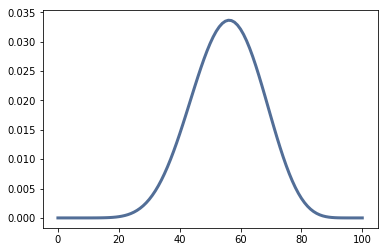

In [57]:
thinkplot.Pdf(suite)

In [58]:
suite.Mean()

55.55555555555914

Intuitively, we imagine that over multiple games, the better team is more likely to win more games (and thus win a series) over that span than they are to win an individual game. This is reflected in our prediction relative to the mean:

In [46]:
predict_series_prob(suite)

0.5905

Now we perform an update to reflect the Sox winning 2 out of 3 games:

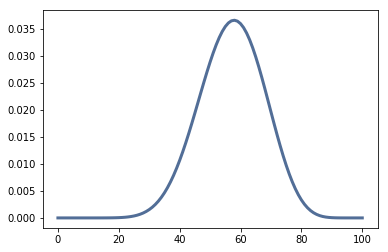

In [47]:
for data in 'WWL':
    suite.Update(data)
    
thinkplot.Pdf(suite)

In [48]:
suite.Mean()

57.14285714285721

In [49]:
predict_series_prob(suite)

0.6285

Both the mean of the distribution and our series prediction got bumped up by a couple of percentage points. This is the direction we expected, but it also indicates that (at least based on our model) the predictive value of this particular series is not incredibly meaningful.